In [2]:
import easyvvuq as uq
import os
from custom import CustomEncoder
import numpy as np
import pandas as pd

In [3]:
home = '/Users/robertsinclair/codes/FabSim3/plugins/FabCovidsim/adaptive_robbie2'
output_columns = ["cumDeath"]
work_dir = '~/postdoc1/covid/campaigns'
config = 'disease_adaptive'

In [4]:
# load campagin state
campaign = uq.Campaign(state_file="covid_easyvvuq_state.json", 
                       work_dir=work_dir)
sampler = campaign.get_active_sampler()
sampler.load_state("covid_sampler_state.pickle")
campaign.set_sampler(sampler)
analysis = uq.analysis.SCAnalysis(sampler=sampler, qoi_cols=output_columns)
analysis.load_state("covid_analysis_state.pickle")
sampler = campaign.get_active_sampler()
sampler.load_state("covid_sampler_state.pickle")

Loading sampler state from covid_sampler_state.pickle
Loading analysis state from covid_analysis_state.pickle
Loading sampler state from covid_sampler_state.pickle


In [5]:
# make the input parameters more readable for a journal paper

params = list(analysis.sampler.vary.get_keys())
params[9] = 'Relative_transmission_rates_for elementary schools'
params[10] = 'Relative_transmission_rates_for high schools'
params[11] = 'Relative_transmission_rates_for universities'
params[12] = 'Relative_transmission_rates_for office/workplace'
params[13] = 'Relative_spatial_contact_rates_by_age'

for i,param in enumerate(params):
    params[i] = param.replace('_',' ')

# Table of params

This is just a pandas dataframe, this will be specific to each group so make it by whatever means neccesary 

In [6]:
defaults = {
        "Symptomatic_infectiousness_relative_to_asymptomatic": 1.75,
        "Proportion_symptomatic": 0.6,
        "Latent_period": 5,
        "Mortality_factor": 1.0,
        "Reproduction_number": None,
        "Infectious_period": 13.55,
        "Household_attack_rate": 0.145,
        "Household_transmission_denominator_power": 0.8,
        "Delay_from_end_of_latent_period_to_start_of_symptoms": 0.75,
        "Relative_transmission_rates_for_place_types0": 0.115,
        "Relative_transmission_rates_for_place_types1": 0.115,
        "Relative_transmission_rates_for_place_types2": 0.075,
        "Relative_transmission_rates_for_place_types3": 0.06,
        "Relative_spatial_contact_rates_by_age_power": 2.125
}
choice = {
        "Symptomatic_infectiousness_relative_to_asymptomatic": 'Literature',
        "Proportion_symptomatic": 'Literature',
        "Latent_period": 'Literature',
        "Mortality_factor": '+/- 20%',
        "Reproduction_number": 'Literature',
        "Infectious_period": 'Literature',
        "Household_attack_rate": 'Suggested by Imperial',
        "Household_transmission_denominator_power": 'Suggested by Imperial',
        "Delay_from_end_of_latent_period_to_start_of_symptoms": 'Literature',
        "Relative_transmission_rates_for_place_types0": 'Suggested by Imperial',
        "Relative_transmission_rates_for_place_types1": 'Suggested by Imperial',
        "Relative_transmission_rates_for_place_types2": 'Suggested by Imperial',
        "Relative_transmission_rates_for_place_types3": 'Suggested by Imperial',
        "Relative_spatial_contact_rates_by_age_power": 'Suggested by Imperial'
}

In [7]:
adapt_measure = np.max(analysis.l_norm, axis=0)

In [8]:
data = {
    'default':[],
    'min':[],
    'max':[],
    'reason for range':[],
    'max quadrature order':[],
}
index = []

for i, (key, dist) in enumerate(analysis.sampler.vary.vary_dict.items()):
    data['min'] += [dist.lower]
    data['max'] += [dist.upper]
    data['max quadrature order'] += [adapt_measure[i]]
    data['default'] += [defaults[key]]
    data['reason for range'] += [choice[key]]
data['min'] = [float(x) for x in data['min']]
data['max'] = [float(x) for x in data['max']]
    
data = pd.DataFrame(data, index=params)
data.sort_values('max quadrature order', ascending=False)

print(data.to_latex())
data

\begin{tabular}{lrrrlr}
\toprule
{} &  default &    min &    max &       reason for range &  max quadrature order \\
\midrule
Symptomatic infectiousness relative to asymptom... &    1.750 &   1.00 &   2.00 &             Literature &                     2 \\
Proportion symptomatic                             &    0.600 &   0.40 &   0.80 &             Literature &                     3 \\
Latent period                                      &    5.000 &   3.00 &   6.00 &             Literature &                     2 \\
Mortality factor                                   &    1.000 &   0.80 &   1.20 &                +/- 20\% &                     1 \\
Reproduction number                                &      NaN &   2.00 &   2.70 &             Literature &                     2 \\
Infectious period                                  &   13.550 &  11.50 &  15.60 &             Literature &                     1 \\
Household attack rate                              &    0.145 &   0.10 &   0.19 &

,default,min,max,reason for range,max quadrature order
Symptomatic infectiousness relative to asymptomatic,1.750,1.00,2.00,Literature,2
Proportion symptomatic,0.600,0.40,0.80,Literature,3
Latent period,5.000,3.00,6.00,Literature,2
Mortality factor,1.000,0.80,1.20,+/- 20%,1
Reproduction number,NaN,2.00,2.70,Literature,2
Infectious period,13.550,11.50,15.60,Literature,1
Household attack rate,0.145,0.10,0.19,Suggested by Imperial,2
Household transmission denominator power,0.800,0.70,0.90,Suggested by Imperial,1
Delay from end of latent period to start of symptoms,0.750,0.00,1.50,Literature,2
Relative transmission rates for elementary schools,0.115,0.08,0.15,Suggested by Imperial,1


# Sobol indeces

First run the analysis, this will take a while. Then plot the first order sobol indeces.

Then calculate the total sobol indeces, this also takes a while and gives a better idea of the total importance of a parameter. 

In [8]:
campaign.apply_analysis(analysis)
results = campaign.get_last_analysis()

Computing combination coefficients...
done
Computing collocation points and level indices...
done.
Loading samples...
done
Computing moments...
done
Computing PCE coefficients of refinement 1 / 77
Skipping PCE coefficients of refinement 2 / 77
Skipping PCE coefficients of refinement 3 / 77
Computing PCE coefficients of refinement 4 / 77
Computing PCE coefficients of refinement 5 / 77
Skipping PCE coefficients of refinement 6 / 77
Skipping PCE coefficients of refinement 7 / 77
Computing PCE coefficients of refinement 8 / 77
Computing PCE coefficients of refinement 9 / 77
Skipping PCE coefficients of refinement 10 / 77
Skipping PCE coefficients of refinement 11 / 77
Skipping PCE coefficients of refinement 12 / 77
Skipping PCE coefficients of refinement 13 / 77
Skipping PCE coefficients of refinement 14 / 77
Skipping PCE coefficients of refinement 15 / 77
Skipping PCE coefficients of refinement 16 / 77
Skipping PCE coefficients of refinement 17 / 77
Skipping PCE coefficients of refinement

/Users/robertsinclair/anaconda3/envs/easyvvuq/lib/python3.6/site-packages/easyvvuq-0.5.3+25.g08262e4-py3.6.egg/easyvvuq/analysis/sc_analysis.py:1193: RuntimeWarning: invalid value encountered in true_divide


In [9]:
sobols_first = results["sobols_first"][output_columns[0]]

Text(0, 0.5, 'First order Sobol index')

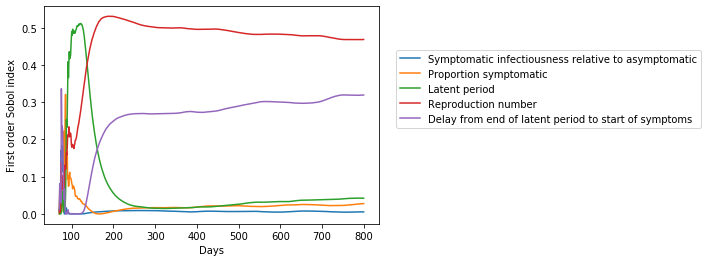

In [10]:
# plot first order sobol indeces by time

import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure()

x = range(801)
for i,v in enumerate(sobols_first):
    y = sobols_first[v]
    important = False
    if y[-1] > 0.001:
        ax = sns.lineplot(x=x,y=sobols_first[v],label=params[i])

plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0.)
plt.xlabel('Days')
plt.ylabel('First order Sobol index')

In [12]:
mean, D, D_u, S_u = analysis.get_pce_sobol_indices('cumDeath','all')

Computing PCE coefficients of refinement 1 / 77
Skipping PCE coefficients of refinement 2 / 77
Skipping PCE coefficients of refinement 3 / 77
Computing PCE coefficients of refinement 4 / 77
Computing PCE coefficients of refinement 5 / 77
Skipping PCE coefficients of refinement 6 / 77
Skipping PCE coefficients of refinement 7 / 77
Computing PCE coefficients of refinement 8 / 77
Computing PCE coefficients of refinement 9 / 77
Skipping PCE coefficients of refinement 10 / 77
Skipping PCE coefficients of refinement 11 / 77
Skipping PCE coefficients of refinement 12 / 77
Skipping PCE coefficients of refinement 13 / 77
Skipping PCE coefficients of refinement 14 / 77
Skipping PCE coefficients of refinement 15 / 77
Skipping PCE coefficients of refinement 16 / 77
Skipping PCE coefficients of refinement 17 / 77
Skipping PCE coefficients of refinement 18 / 77
Skipping PCE coefficients of refinement 19 / 77
Skipping PCE coefficients of refinement 20 / 77
Computing PCE coefficients of refinement 21 

Multi indices of dimension u = (1, 7, 9) are []
Multi indices of dimension u = (1, 7, 10) are []
Multi indices of dimension u = (1, 7, 11) are []
Multi indices of dimension u = (1, 7, 12) are []
Multi indices of dimension u = (1, 7, 13) are []
Multi indices of dimension u = (1, 8, 9) are []
Multi indices of dimension u = (1, 8, 10) are []
Multi indices of dimension u = (1, 8, 11) are []
Multi indices of dimension u = (1, 8, 12) are []
Multi indices of dimension u = (1, 8, 13) are []
Multi indices of dimension u = (1, 9, 10) are []
Multi indices of dimension u = (1, 9, 11) are []
Multi indices of dimension u = (1, 9, 12) are []
Multi indices of dimension u = (1, 9, 13) are []
Multi indices of dimension u = (1, 10, 11) are []
Multi indices of dimension u = (1, 10, 12) are []
Multi indices of dimension u = (1, 10, 13) are []
Multi indices of dimension u = (1, 11, 12) are []
Multi indices of dimension u = (1, 11, 13) are []
Multi indices of dimension u = (1, 12, 13) are []
Multi indices of

Multi indices of dimension u = (0, 1, 10, 13) are []
Multi indices of dimension u = (0, 1, 11, 12) are []
Multi indices of dimension u = (0, 1, 11, 13) are []
Multi indices of dimension u = (0, 1, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 4) are []
Multi indices of dimension u = (0, 2, 3, 5) are []
Multi indices of dimension u = (0, 2, 3, 6) are []
Multi indices of dimension u = (0, 2, 3, 7) are []
Multi indices of dimension u = (0, 2, 3, 8) are []
Multi indices of dimension u = (0, 2, 3, 9) are []
Multi indices of dimension u = (0, 2, 3, 10) are []
Multi indices of dimension u = (0, 2, 3, 11) are []
Multi indices of dimension u = (0, 2, 3, 12) are []
Multi indices of dimension u = (0, 2, 3, 13) are []
Multi indices of dimension u = (0, 2, 4, 5) are []
Multi indices of dimension u = (0, 2, 4, 6) are []
Multi indices of dimension u = (0, 2, 4, 7) are []
Multi indices of dimension u = (0, 2, 4, 8) are []
Multi indices of dimension u = (0, 2, 4, 9) are []
Multi indices of di

Multi indices of dimension u = (1, 3, 5, 8) are []
Multi indices of dimension u = (1, 3, 5, 9) are []
Multi indices of dimension u = (1, 3, 5, 10) are []
Multi indices of dimension u = (1, 3, 5, 11) are []
Multi indices of dimension u = (1, 3, 5, 12) are []
Multi indices of dimension u = (1, 3, 5, 13) are []
Multi indices of dimension u = (1, 3, 6, 7) are []
Multi indices of dimension u = (1, 3, 6, 8) are []
Multi indices of dimension u = (1, 3, 6, 9) are []
Multi indices of dimension u = (1, 3, 6, 10) are []
Multi indices of dimension u = (1, 3, 6, 11) are []
Multi indices of dimension u = (1, 3, 6, 12) are []
Multi indices of dimension u = (1, 3, 6, 13) are []
Multi indices of dimension u = (1, 3, 7, 8) are []
Multi indices of dimension u = (1, 3, 7, 9) are []
Multi indices of dimension u = (1, 3, 7, 10) are []
Multi indices of dimension u = (1, 3, 7, 11) are []
Multi indices of dimension u = (1, 3, 7, 12) are []
Multi indices of dimension u = (1, 3, 7, 13) are []
Multi indices of di

Multi indices of dimension u = (2, 8, 9, 10) are []
Multi indices of dimension u = (2, 8, 9, 11) are []
Multi indices of dimension u = (2, 8, 9, 12) are []
Multi indices of dimension u = (2, 8, 9, 13) are []
Multi indices of dimension u = (2, 8, 10, 11) are []
Multi indices of dimension u = (2, 8, 10, 12) are []
Multi indices of dimension u = (2, 8, 10, 13) are []
Multi indices of dimension u = (2, 8, 11, 12) are []
Multi indices of dimension u = (2, 8, 11, 13) are []
Multi indices of dimension u = (2, 8, 12, 13) are []
Multi indices of dimension u = (2, 9, 10, 11) are []
Multi indices of dimension u = (2, 9, 10, 12) are []
Multi indices of dimension u = (2, 9, 10, 13) are []
Multi indices of dimension u = (2, 9, 11, 12) are []
Multi indices of dimension u = (2, 9, 11, 13) are []
Multi indices of dimension u = (2, 9, 12, 13) are []
Multi indices of dimension u = (2, 10, 11, 12) are []
Multi indices of dimension u = (2, 10, 11, 13) are []
Multi indices of dimension u = (2, 10, 12, 13) a

Multi indices of dimension u = (6, 8, 11, 13) are []
Multi indices of dimension u = (6, 8, 12, 13) are []
Multi indices of dimension u = (6, 9, 10, 11) are []
Multi indices of dimension u = (6, 9, 10, 12) are []
Multi indices of dimension u = (6, 9, 10, 13) are []
Multi indices of dimension u = (6, 9, 11, 12) are []
Multi indices of dimension u = (6, 9, 11, 13) are []
Multi indices of dimension u = (6, 9, 12, 13) are []
Multi indices of dimension u = (6, 10, 11, 12) are []
Multi indices of dimension u = (6, 10, 11, 13) are []
Multi indices of dimension u = (6, 10, 12, 13) are []
Multi indices of dimension u = (6, 11, 12, 13) are []
Multi indices of dimension u = (7, 8, 9, 10) are []
Multi indices of dimension u = (7, 8, 9, 11) are []
Multi indices of dimension u = (7, 8, 9, 12) are []
Multi indices of dimension u = (7, 8, 9, 13) are []
Multi indices of dimension u = (7, 8, 10, 11) are []
Multi indices of dimension u = (7, 8, 10, 12) are []
Multi indices of dimension u = (7, 8, 10, 13) 

Multi indices of dimension u = (0, 2, 3, 5, 11) are []
Multi indices of dimension u = (0, 2, 3, 5, 12) are []
Multi indices of dimension u = (0, 2, 3, 5, 13) are []
Multi indices of dimension u = (0, 2, 3, 6, 7) are []
Multi indices of dimension u = (0, 2, 3, 6, 8) are []
Multi indices of dimension u = (0, 2, 3, 6, 9) are []
Multi indices of dimension u = (0, 2, 3, 6, 10) are []
Multi indices of dimension u = (0, 2, 3, 6, 11) are []
Multi indices of dimension u = (0, 2, 3, 6, 12) are []
Multi indices of dimension u = (0, 2, 3, 6, 13) are []
Multi indices of dimension u = (0, 2, 3, 7, 8) are []
Multi indices of dimension u = (0, 2, 3, 7, 9) are []
Multi indices of dimension u = (0, 2, 3, 7, 10) are []
Multi indices of dimension u = (0, 2, 3, 7, 11) are []
Multi indices of dimension u = (0, 2, 3, 7, 12) are []
Multi indices of dimension u = (0, 2, 3, 7, 13) are []
Multi indices of dimension u = (0, 2, 3, 8, 9) are []
Multi indices of dimension u = (0, 2, 3, 8, 10) are []
Multi indices of

Multi indices of dimension u = (0, 4, 5, 9, 11) are []
Multi indices of dimension u = (0, 4, 5, 9, 12) are []
Multi indices of dimension u = (0, 4, 5, 9, 13) are []
Multi indices of dimension u = (0, 4, 5, 10, 11) are []
Multi indices of dimension u = (0, 4, 5, 10, 12) are []
Multi indices of dimension u = (0, 4, 5, 10, 13) are []
Multi indices of dimension u = (0, 4, 5, 11, 12) are []
Multi indices of dimension u = (0, 4, 5, 11, 13) are []
Multi indices of dimension u = (0, 4, 5, 12, 13) are []
Multi indices of dimension u = (0, 4, 6, 7, 8) are []
Multi indices of dimension u = (0, 4, 6, 7, 9) are []
Multi indices of dimension u = (0, 4, 6, 7, 10) are []
Multi indices of dimension u = (0, 4, 6, 7, 11) are []
Multi indices of dimension u = (0, 4, 6, 7, 12) are []
Multi indices of dimension u = (0, 4, 6, 7, 13) are []
Multi indices of dimension u = (0, 4, 6, 8, 9) are []
Multi indices of dimension u = (0, 4, 6, 8, 10) are []
Multi indices of dimension u = (0, 4, 6, 8, 11) are []
Multi i

Multi indices of dimension u = (1, 2, 5, 8, 12) are []
Multi indices of dimension u = (1, 2, 5, 8, 13) are []
Multi indices of dimension u = (1, 2, 5, 9, 10) are []
Multi indices of dimension u = (1, 2, 5, 9, 11) are []
Multi indices of dimension u = (1, 2, 5, 9, 12) are []
Multi indices of dimension u = (1, 2, 5, 9, 13) are []
Multi indices of dimension u = (1, 2, 5, 10, 11) are []
Multi indices of dimension u = (1, 2, 5, 10, 12) are []
Multi indices of dimension u = (1, 2, 5, 10, 13) are []
Multi indices of dimension u = (1, 2, 5, 11, 12) are []
Multi indices of dimension u = (1, 2, 5, 11, 13) are []
Multi indices of dimension u = (1, 2, 5, 12, 13) are []
Multi indices of dimension u = (1, 2, 6, 7, 8) are []
Multi indices of dimension u = (1, 2, 6, 7, 9) are []
Multi indices of dimension u = (1, 2, 6, 7, 10) are []
Multi indices of dimension u = (1, 2, 6, 7, 11) are []
Multi indices of dimension u = (1, 2, 6, 7, 12) are []
Multi indices of dimension u = (1, 2, 6, 7, 13) are []
Multi 

Multi indices of dimension u = (1, 5, 7, 8, 11) are []
Multi indices of dimension u = (1, 5, 7, 8, 12) are []
Multi indices of dimension u = (1, 5, 7, 8, 13) are []
Multi indices of dimension u = (1, 5, 7, 9, 10) are []
Multi indices of dimension u = (1, 5, 7, 9, 11) are []
Multi indices of dimension u = (1, 5, 7, 9, 12) are []
Multi indices of dimension u = (1, 5, 7, 9, 13) are []
Multi indices of dimension u = (1, 5, 7, 10, 11) are []
Multi indices of dimension u = (1, 5, 7, 10, 12) are []
Multi indices of dimension u = (1, 5, 7, 10, 13) are []
Multi indices of dimension u = (1, 5, 7, 11, 12) are []
Multi indices of dimension u = (1, 5, 7, 11, 13) are []
Multi indices of dimension u = (1, 5, 7, 12, 13) are []
Multi indices of dimension u = (1, 5, 8, 9, 10) are []
Multi indices of dimension u = (1, 5, 8, 9, 11) are []
Multi indices of dimension u = (1, 5, 8, 9, 12) are []
Multi indices of dimension u = (1, 5, 8, 9, 13) are []
Multi indices of dimension u = (1, 5, 8, 10, 11) are []
Mul

Multi indices of dimension u = (2, 4, 9, 11, 13) are []
Multi indices of dimension u = (2, 4, 9, 12, 13) are []
Multi indices of dimension u = (2, 4, 10, 11, 12) are []
Multi indices of dimension u = (2, 4, 10, 11, 13) are []
Multi indices of dimension u = (2, 4, 10, 12, 13) are []
Multi indices of dimension u = (2, 4, 11, 12, 13) are []
Multi indices of dimension u = (2, 5, 6, 7, 8) are []
Multi indices of dimension u = (2, 5, 6, 7, 9) are []
Multi indices of dimension u = (2, 5, 6, 7, 10) are []
Multi indices of dimension u = (2, 5, 6, 7, 11) are []
Multi indices of dimension u = (2, 5, 6, 7, 12) are []
Multi indices of dimension u = (2, 5, 6, 7, 13) are []
Multi indices of dimension u = (2, 5, 6, 8, 9) are []
Multi indices of dimension u = (2, 5, 6, 8, 10) are []
Multi indices of dimension u = (2, 5, 6, 8, 11) are []
Multi indices of dimension u = (2, 5, 6, 8, 12) are []
Multi indices of dimension u = (2, 5, 6, 8, 13) are []
Multi indices of dimension u = (2, 5, 6, 9, 10) are []
Mul

Multi indices of dimension u = (3, 7, 8, 9, 12) are []
Multi indices of dimension u = (3, 7, 8, 9, 13) are []
Multi indices of dimension u = (3, 7, 8, 10, 11) are []
Multi indices of dimension u = (3, 7, 8, 10, 12) are []
Multi indices of dimension u = (3, 7, 8, 10, 13) are []
Multi indices of dimension u = (3, 7, 8, 11, 12) are []
Multi indices of dimension u = (3, 7, 8, 11, 13) are []
Multi indices of dimension u = (3, 7, 8, 12, 13) are []
Multi indices of dimension u = (3, 7, 9, 10, 11) are []
Multi indices of dimension u = (3, 7, 9, 10, 12) are []
Multi indices of dimension u = (3, 7, 9, 10, 13) are []
Multi indices of dimension u = (3, 7, 9, 11, 12) are []
Multi indices of dimension u = (3, 7, 9, 11, 13) are []
Multi indices of dimension u = (3, 7, 9, 12, 13) are []
Multi indices of dimension u = (3, 7, 10, 11, 12) are []
Multi indices of dimension u = (3, 7, 10, 11, 13) are []
Multi indices of dimension u = (3, 7, 10, 12, 13) are []
Multi indices of dimension u = (3, 7, 11, 12, 1

Multi indices of dimension u = (0, 1, 2, 3, 7, 11) are []
Multi indices of dimension u = (0, 1, 2, 3, 7, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 7, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 8, 9) are []
Multi indices of dimension u = (0, 1, 2, 3, 8, 10) are []
Multi indices of dimension u = (0, 1, 2, 3, 8, 11) are []
Multi indices of dimension u = (0, 1, 2, 3, 8, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 8, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 9, 10) are []
Multi indices of dimension u = (0, 1, 2, 3, 9, 11) are []
Multi indices of dimension u = (0, 1, 2, 3, 9, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 9, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 10, 11) are []
Multi indices of dimension u = (0, 1, 2, 3, 10, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 10, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 11, 13) are []
Multi indi

Multi indices of dimension u = (0, 1, 4, 5, 10, 11) are []
Multi indices of dimension u = (0, 1, 4, 5, 10, 12) are []
Multi indices of dimension u = (0, 1, 4, 5, 10, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 11, 12) are []
Multi indices of dimension u = (0, 1, 4, 5, 11, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 8) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 9) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 10) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 11) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 12) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 13) are []
Multi indices of dimension u = (0, 1, 4, 6, 8, 9) are []
Multi indices of dimension u = (0, 1, 4, 6, 8, 10) are []
Multi indices of dimension u = (0, 1, 4, 6, 8, 11) are []
Multi indices of dimension u = (0, 1, 4, 6, 8, 12) are []
Multi indices of dimension u = (0, 1, 4, 6, 8, 13) are []
Multi indic

Multi indices of dimension u = (0, 2, 3, 8, 9, 13) are []
Multi indices of dimension u = (0, 2, 3, 8, 10, 11) are []
Multi indices of dimension u = (0, 2, 3, 8, 10, 12) are []
Multi indices of dimension u = (0, 2, 3, 8, 10, 13) are []
Multi indices of dimension u = (0, 2, 3, 8, 11, 12) are []
Multi indices of dimension u = (0, 2, 3, 8, 11, 13) are []
Multi indices of dimension u = (0, 2, 3, 8, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 9, 10, 11) are []
Multi indices of dimension u = (0, 2, 3, 9, 10, 12) are []
Multi indices of dimension u = (0, 2, 3, 9, 10, 13) are []
Multi indices of dimension u = (0, 2, 3, 9, 11, 12) are []
Multi indices of dimension u = (0, 2, 3, 9, 11, 13) are []
Multi indices of dimension u = (0, 2, 3, 9, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 10, 11, 12) are []
Multi indices of dimension u = (0, 2, 3, 10, 11, 13) are []
Multi indices of dimension u = (0, 2, 3, 10, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 11, 12, 13) a

Multi indices of dimension u = (0, 3, 4, 8, 10, 12) are []
Multi indices of dimension u = (0, 3, 4, 8, 10, 13) are []
Multi indices of dimension u = (0, 3, 4, 8, 11, 12) are []
Multi indices of dimension u = (0, 3, 4, 8, 11, 13) are []
Multi indices of dimension u = (0, 3, 4, 8, 12, 13) are []
Multi indices of dimension u = (0, 3, 4, 9, 10, 11) are []
Multi indices of dimension u = (0, 3, 4, 9, 10, 12) are []
Multi indices of dimension u = (0, 3, 4, 9, 10, 13) are []
Multi indices of dimension u = (0, 3, 4, 9, 11, 12) are []
Multi indices of dimension u = (0, 3, 4, 9, 11, 13) are []
Multi indices of dimension u = (0, 3, 4, 9, 12, 13) are []
Multi indices of dimension u = (0, 3, 4, 10, 11, 12) are []
Multi indices of dimension u = (0, 3, 4, 10, 11, 13) are []
Multi indices of dimension u = (0, 3, 4, 10, 12, 13) are []
Multi indices of dimension u = (0, 3, 4, 11, 12, 13) are []
Multi indices of dimension u = (0, 3, 5, 6, 7, 8) are []
Multi indices of dimension u = (0, 3, 5, 6, 7, 9) are 

Multi indices of dimension u = (0, 5, 6, 10, 11, 13) are []
Multi indices of dimension u = (0, 5, 6, 10, 12, 13) are []
Multi indices of dimension u = (0, 5, 6, 11, 12, 13) are []
Multi indices of dimension u = (0, 5, 7, 8, 9, 10) are []
Multi indices of dimension u = (0, 5, 7, 8, 9, 11) are []
Multi indices of dimension u = (0, 5, 7, 8, 9, 12) are []
Multi indices of dimension u = (0, 5, 7, 8, 9, 13) are []
Multi indices of dimension u = (0, 5, 7, 8, 10, 11) are []
Multi indices of dimension u = (0, 5, 7, 8, 10, 12) are []
Multi indices of dimension u = (0, 5, 7, 8, 10, 13) are []
Multi indices of dimension u = (0, 5, 7, 8, 11, 12) are []
Multi indices of dimension u = (0, 5, 7, 8, 11, 13) are []
Multi indices of dimension u = (0, 5, 7, 8, 12, 13) are []
Multi indices of dimension u = (0, 5, 7, 9, 10, 11) are []
Multi indices of dimension u = (0, 5, 7, 9, 10, 12) are []
Multi indices of dimension u = (0, 5, 7, 9, 10, 13) are []
Multi indices of dimension u = (0, 5, 7, 9, 11, 12) are [

Multi indices of dimension u = (1, 2, 5, 6, 7, 10) are []
Multi indices of dimension u = (1, 2, 5, 6, 7, 11) are []
Multi indices of dimension u = (1, 2, 5, 6, 7, 12) are []
Multi indices of dimension u = (1, 2, 5, 6, 7, 13) are []
Multi indices of dimension u = (1, 2, 5, 6, 8, 9) are []
Multi indices of dimension u = (1, 2, 5, 6, 8, 10) are []
Multi indices of dimension u = (1, 2, 5, 6, 8, 11) are []
Multi indices of dimension u = (1, 2, 5, 6, 8, 12) are []
Multi indices of dimension u = (1, 2, 5, 6, 8, 13) are []
Multi indices of dimension u = (1, 2, 5, 6, 9, 10) are []
Multi indices of dimension u = (1, 2, 5, 6, 9, 11) are []
Multi indices of dimension u = (1, 2, 5, 6, 9, 12) are []
Multi indices of dimension u = (1, 2, 5, 6, 9, 13) are []
Multi indices of dimension u = (1, 2, 5, 6, 10, 11) are []
Multi indices of dimension u = (1, 2, 5, 6, 10, 12) are []
Multi indices of dimension u = (1, 2, 5, 6, 10, 13) are []
Multi indices of dimension u = (1, 2, 5, 6, 11, 12) are []
Multi indic

Multi indices of dimension u = (1, 3, 6, 9, 11, 12) are []
Multi indices of dimension u = (1, 3, 6, 9, 11, 13) are []
Multi indices of dimension u = (1, 3, 6, 9, 12, 13) are []
Multi indices of dimension u = (1, 3, 6, 10, 11, 12) are []
Multi indices of dimension u = (1, 3, 6, 10, 11, 13) are []
Multi indices of dimension u = (1, 3, 6, 10, 12, 13) are []
Multi indices of dimension u = (1, 3, 6, 11, 12, 13) are []
Multi indices of dimension u = (1, 3, 7, 8, 9, 10) are []
Multi indices of dimension u = (1, 3, 7, 8, 9, 11) are []
Multi indices of dimension u = (1, 3, 7, 8, 9, 12) are []
Multi indices of dimension u = (1, 3, 7, 8, 9, 13) are []
Multi indices of dimension u = (1, 3, 7, 8, 10, 11) are []
Multi indices of dimension u = (1, 3, 7, 8, 10, 12) are []
Multi indices of dimension u = (1, 3, 7, 8, 10, 13) are []
Multi indices of dimension u = (1, 3, 7, 8, 11, 12) are []
Multi indices of dimension u = (1, 3, 7, 8, 11, 13) are []
Multi indices of dimension u = (1, 3, 7, 8, 12, 13) are 

Multi indices of dimension u = (2, 3, 4, 5, 7, 10) are []
Multi indices of dimension u = (2, 3, 4, 5, 7, 11) are []
Multi indices of dimension u = (2, 3, 4, 5, 7, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 7, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 8, 9) are []
Multi indices of dimension u = (2, 3, 4, 5, 8, 10) are []
Multi indices of dimension u = (2, 3, 4, 5, 8, 11) are []
Multi indices of dimension u = (2, 3, 4, 5, 8, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 8, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 9, 10) are []
Multi indices of dimension u = (2, 3, 4, 5, 9, 11) are []
Multi indices of dimension u = (2, 3, 4, 5, 9, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 9, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 10, 11) are []
Multi indices of dimension u = (2, 3, 4, 5, 10, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 10, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 11, 12) are []
Multi indic

Multi indices of dimension u = (2, 4, 7, 9, 11, 12) are []
Multi indices of dimension u = (2, 4, 7, 9, 11, 13) are []
Multi indices of dimension u = (2, 4, 7, 9, 12, 13) are []
Multi indices of dimension u = (2, 4, 7, 10, 11, 12) are []
Multi indices of dimension u = (2, 4, 7, 10, 11, 13) are []
Multi indices of dimension u = (2, 4, 7, 10, 12, 13) are []
Multi indices of dimension u = (2, 4, 7, 11, 12, 13) are []
Multi indices of dimension u = (2, 4, 8, 9, 10, 11) are []
Multi indices of dimension u = (2, 4, 8, 9, 10, 12) are []
Multi indices of dimension u = (2, 4, 8, 9, 10, 13) are []
Multi indices of dimension u = (2, 4, 8, 9, 11, 12) are []
Multi indices of dimension u = (2, 4, 8, 9, 11, 13) are []
Multi indices of dimension u = (2, 4, 8, 9, 12, 13) are []
Multi indices of dimension u = (2, 4, 8, 10, 11, 12) are []
Multi indices of dimension u = (2, 4, 8, 10, 11, 13) are []
Multi indices of dimension u = (2, 4, 8, 10, 12, 13) are []
Multi indices of dimension u = (2, 4, 8, 11, 12, 

Multi indices of dimension u = (3, 5, 7, 8, 11, 13) are []
Multi indices of dimension u = (3, 5, 7, 8, 12, 13) are []
Multi indices of dimension u = (3, 5, 7, 9, 10, 11) are []
Multi indices of dimension u = (3, 5, 7, 9, 10, 12) are []
Multi indices of dimension u = (3, 5, 7, 9, 10, 13) are []
Multi indices of dimension u = (3, 5, 7, 9, 11, 12) are []
Multi indices of dimension u = (3, 5, 7, 9, 11, 13) are []
Multi indices of dimension u = (3, 5, 7, 9, 12, 13) are []
Multi indices of dimension u = (3, 5, 7, 10, 11, 12) are []
Multi indices of dimension u = (3, 5, 7, 10, 11, 13) are []
Multi indices of dimension u = (3, 5, 7, 10, 12, 13) are []
Multi indices of dimension u = (3, 5, 7, 11, 12, 13) are []
Multi indices of dimension u = (3, 5, 8, 9, 10, 11) are []
Multi indices of dimension u = (3, 5, 8, 9, 10, 12) are []
Multi indices of dimension u = (3, 5, 8, 9, 10, 13) are []
Multi indices of dimension u = (3, 5, 8, 9, 11, 12) are []
Multi indices of dimension u = (3, 5, 8, 9, 11, 13) 

Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 9) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 10) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 11) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 8, 9) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 8, 10) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 8, 11) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 8, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 8, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 9, 10) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 9, 11) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 9, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 9, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 10, 11) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 10, 12) are []
Multi indices of dimensi

Multi indices of dimension u = (0, 1, 2, 6, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 6, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 6, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 6, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 7, 8, 9, 10) are []
Multi indices of dimension u = (0, 1, 2, 7, 8, 9, 11) are []
Multi indices of dimension u = (0, 1, 2, 7, 8, 9, 12) are []
Multi indices of dimension u = (0, 1, 2, 7, 8, 9, 13) are []
Multi indices of dimension u = (0, 1, 2, 7, 8, 10, 11) are []
Multi indices of dimension u = (0, 1, 2, 7, 8, 10, 12) are []
Multi indices of dimension u = (0, 1, 2, 7, 8, 10, 13) are []
Multi indices of dimension u = (0, 1, 2, 7, 8, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 7, 8, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 7, 8, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 7, 9, 10, 11) are []
Multi indices of dimension u = (0, 1, 2, 7, 9, 10, 12) are []
Multi in

Multi indices of dimension u = (0, 1, 4, 5, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 8, 9) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 8, 10) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 8, 11) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 8, 12) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 8, 13) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 9, 10) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 9, 11) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 9, 12) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 9, 13) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 10, 11) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 10, 12) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 10, 13) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 11, 12) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 11, 13) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 12, 13) are []
Multi indices of 

Multi indices of dimension u = (0, 2, 3, 4, 8, 11, 13) are []
Multi indices of dimension u = (0, 2, 3, 4, 8, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 4, 9, 10, 11) are []
Multi indices of dimension u = (0, 2, 3, 4, 9, 10, 12) are []
Multi indices of dimension u = (0, 2, 3, 4, 9, 10, 13) are []
Multi indices of dimension u = (0, 2, 3, 4, 9, 11, 12) are []
Multi indices of dimension u = (0, 2, 3, 4, 9, 11, 13) are []
Multi indices of dimension u = (0, 2, 3, 4, 9, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 4, 10, 11, 12) are []
Multi indices of dimension u = (0, 2, 3, 4, 10, 11, 13) are []
Multi indices of dimension u = (0, 2, 3, 4, 10, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 4, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 8) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 9) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 10) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 11) are []
Multi indi

Multi indices of dimension u = (0, 2, 5, 6, 9, 12, 13) are []
Multi indices of dimension u = (0, 2, 5, 6, 10, 11, 12) are []
Multi indices of dimension u = (0, 2, 5, 6, 10, 11, 13) are []
Multi indices of dimension u = (0, 2, 5, 6, 10, 12, 13) are []
Multi indices of dimension u = (0, 2, 5, 6, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 5, 7, 8, 9, 10) are []
Multi indices of dimension u = (0, 2, 5, 7, 8, 9, 11) are []
Multi indices of dimension u = (0, 2, 5, 7, 8, 9, 12) are []
Multi indices of dimension u = (0, 2, 5, 7, 8, 9, 13) are []
Multi indices of dimension u = (0, 2, 5, 7, 8, 10, 11) are []
Multi indices of dimension u = (0, 2, 5, 7, 8, 10, 12) are []
Multi indices of dimension u = (0, 2, 5, 7, 8, 10, 13) are []
Multi indices of dimension u = (0, 2, 5, 7, 8, 11, 12) are []
Multi indices of dimension u = (0, 2, 5, 7, 8, 11, 13) are []
Multi indices of dimension u = (0, 2, 5, 7, 8, 12, 13) are []
Multi indices of dimension u = (0, 2, 5, 7, 9, 10, 11) are []
Multi in

Multi indices of dimension u = (0, 3, 6, 7, 10, 11, 13) are []
Multi indices of dimension u = (0, 3, 6, 7, 10, 12, 13) are []
Multi indices of dimension u = (0, 3, 6, 7, 11, 12, 13) are []
Multi indices of dimension u = (0, 3, 6, 8, 9, 10, 11) are []
Multi indices of dimension u = (0, 3, 6, 8, 9, 10, 12) are []
Multi indices of dimension u = (0, 3, 6, 8, 9, 10, 13) are []
Multi indices of dimension u = (0, 3, 6, 8, 9, 11, 12) are []
Multi indices of dimension u = (0, 3, 6, 8, 9, 11, 13) are []
Multi indices of dimension u = (0, 3, 6, 8, 9, 12, 13) are []
Multi indices of dimension u = (0, 3, 6, 8, 10, 11, 12) are []
Multi indices of dimension u = (0, 3, 6, 8, 10, 11, 13) are []
Multi indices of dimension u = (0, 3, 6, 8, 10, 12, 13) are []
Multi indices of dimension u = (0, 3, 6, 8, 11, 12, 13) are []
Multi indices of dimension u = (0, 3, 6, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 3, 6, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 3, 6, 9, 10, 12, 13) are [

Multi indices of dimension u = (1, 2, 3, 4, 8, 9, 10) are []
Multi indices of dimension u = (1, 2, 3, 4, 8, 9, 11) are []
Multi indices of dimension u = (1, 2, 3, 4, 8, 9, 12) are []
Multi indices of dimension u = (1, 2, 3, 4, 8, 9, 13) are []
Multi indices of dimension u = (1, 2, 3, 4, 8, 10, 11) are []
Multi indices of dimension u = (1, 2, 3, 4, 8, 10, 12) are []
Multi indices of dimension u = (1, 2, 3, 4, 8, 10, 13) are []
Multi indices of dimension u = (1, 2, 3, 4, 8, 11, 12) are []
Multi indices of dimension u = (1, 2, 3, 4, 8, 11, 13) are []
Multi indices of dimension u = (1, 2, 3, 4, 8, 12, 13) are []
Multi indices of dimension u = (1, 2, 3, 4, 9, 10, 11) are []
Multi indices of dimension u = (1, 2, 3, 4, 9, 10, 12) are []
Multi indices of dimension u = (1, 2, 3, 4, 9, 10, 13) are []
Multi indices of dimension u = (1, 2, 3, 4, 9, 11, 12) are []
Multi indices of dimension u = (1, 2, 3, 4, 9, 11, 13) are []
Multi indices of dimension u = (1, 2, 3, 4, 9, 12, 13) are []
Multi indice

Multi indices of dimension u = (1, 2, 5, 6, 9, 10, 11) are []
Multi indices of dimension u = (1, 2, 5, 6, 9, 10, 12) are []
Multi indices of dimension u = (1, 2, 5, 6, 9, 10, 13) are []
Multi indices of dimension u = (1, 2, 5, 6, 9, 11, 12) are []
Multi indices of dimension u = (1, 2, 5, 6, 9, 11, 13) are []
Multi indices of dimension u = (1, 2, 5, 6, 9, 12, 13) are []
Multi indices of dimension u = (1, 2, 5, 6, 10, 11, 12) are []
Multi indices of dimension u = (1, 2, 5, 6, 10, 11, 13) are []
Multi indices of dimension u = (1, 2, 5, 6, 10, 12, 13) are []
Multi indices of dimension u = (1, 2, 5, 6, 11, 12, 13) are []
Multi indices of dimension u = (1, 2, 5, 7, 8, 9, 10) are []
Multi indices of dimension u = (1, 2, 5, 7, 8, 9, 11) are []
Multi indices of dimension u = (1, 2, 5, 7, 8, 9, 12) are []
Multi indices of dimension u = (1, 2, 5, 7, 8, 9, 13) are []
Multi indices of dimension u = (1, 2, 5, 7, 8, 10, 11) are []
Multi indices of dimension u = (1, 2, 5, 7, 8, 10, 12) are []
Multi in

Multi indices of dimension u = (1, 3, 6, 7, 11, 12, 13) are []
Multi indices of dimension u = (1, 3, 6, 8, 9, 10, 11) are []
Multi indices of dimension u = (1, 3, 6, 8, 9, 10, 12) are []
Multi indices of dimension u = (1, 3, 6, 8, 9, 10, 13) are []
Multi indices of dimension u = (1, 3, 6, 8, 9, 11, 12) are []
Multi indices of dimension u = (1, 3, 6, 8, 9, 11, 13) are []
Multi indices of dimension u = (1, 3, 6, 8, 9, 12, 13) are []
Multi indices of dimension u = (1, 3, 6, 8, 10, 11, 12) are []
Multi indices of dimension u = (1, 3, 6, 8, 10, 11, 13) are []
Multi indices of dimension u = (1, 3, 6, 8, 10, 12, 13) are []
Multi indices of dimension u = (1, 3, 6, 8, 11, 12, 13) are []
Multi indices of dimension u = (1, 3, 6, 9, 10, 11, 12) are []
Multi indices of dimension u = (1, 3, 6, 9, 10, 11, 13) are []
Multi indices of dimension u = (1, 3, 6, 9, 10, 12, 13) are []
Multi indices of dimension u = (1, 3, 6, 9, 11, 12, 13) are []
Multi indices of dimension u = (1, 3, 6, 10, 11, 12, 13) are 

Multi indices of dimension u = (2, 3, 4, 6, 7, 9, 12) are []
Multi indices of dimension u = (2, 3, 4, 6, 7, 9, 13) are []
Multi indices of dimension u = (2, 3, 4, 6, 7, 10, 11) are []
Multi indices of dimension u = (2, 3, 4, 6, 7, 10, 12) are []
Multi indices of dimension u = (2, 3, 4, 6, 7, 10, 13) are []
Multi indices of dimension u = (2, 3, 4, 6, 7, 11, 12) are []
Multi indices of dimension u = (2, 3, 4, 6, 7, 11, 13) are []
Multi indices of dimension u = (2, 3, 4, 6, 7, 12, 13) are []
Multi indices of dimension u = (2, 3, 4, 6, 8, 9, 10) are []
Multi indices of dimension u = (2, 3, 4, 6, 8, 9, 11) are []
Multi indices of dimension u = (2, 3, 4, 6, 8, 9, 12) are []
Multi indices of dimension u = (2, 3, 4, 6, 8, 9, 13) are []
Multi indices of dimension u = (2, 3, 4, 6, 8, 10, 11) are []
Multi indices of dimension u = (2, 3, 4, 6, 8, 10, 12) are []
Multi indices of dimension u = (2, 3, 4, 6, 8, 10, 13) are []
Multi indices of dimension u = (2, 3, 4, 6, 8, 11, 12) are []
Multi indices 

Multi indices of dimension u = (2, 4, 8, 9, 11, 12, 13) are []
Multi indices of dimension u = (2, 4, 8, 10, 11, 12, 13) are []
Multi indices of dimension u = (2, 4, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (2, 5, 6, 7, 8, 9, 10) are []
Multi indices of dimension u = (2, 5, 6, 7, 8, 9, 11) are []
Multi indices of dimension u = (2, 5, 6, 7, 8, 9, 12) are []
Multi indices of dimension u = (2, 5, 6, 7, 8, 9, 13) are []
Multi indices of dimension u = (2, 5, 6, 7, 8, 10, 11) are []
Multi indices of dimension u = (2, 5, 6, 7, 8, 10, 12) are []
Multi indices of dimension u = (2, 5, 6, 7, 8, 10, 13) are []
Multi indices of dimension u = (2, 5, 6, 7, 8, 11, 12) are []
Multi indices of dimension u = (2, 5, 6, 7, 8, 11, 13) are []
Multi indices of dimension u = (2, 5, 6, 7, 8, 12, 13) are []
Multi indices of dimension u = (2, 5, 6, 7, 9, 10, 11) are []
Multi indices of dimension u = (2, 5, 6, 7, 9, 10, 12) are []
Multi indices of dimension u = (2, 5, 6, 7, 9, 10, 13) are []
Multi i

Multi indices of dimension u = (4, 5, 6, 8, 9, 10, 11) are []
Multi indices of dimension u = (4, 5, 6, 8, 9, 10, 12) are []
Multi indices of dimension u = (4, 5, 6, 8, 9, 10, 13) are []
Multi indices of dimension u = (4, 5, 6, 8, 9, 11, 12) are []
Multi indices of dimension u = (4, 5, 6, 8, 9, 11, 13) are []
Multi indices of dimension u = (4, 5, 6, 8, 9, 12, 13) are []
Multi indices of dimension u = (4, 5, 6, 8, 10, 11, 12) are []
Multi indices of dimension u = (4, 5, 6, 8, 10, 11, 13) are []
Multi indices of dimension u = (4, 5, 6, 8, 10, 12, 13) are []
Multi indices of dimension u = (4, 5, 6, 8, 11, 12, 13) are []
Multi indices of dimension u = (4, 5, 6, 9, 10, 11, 12) are []
Multi indices of dimension u = (4, 5, 6, 9, 10, 11, 13) are []
Multi indices of dimension u = (4, 5, 6, 9, 10, 12, 13) are []
Multi indices of dimension u = (4, 5, 6, 9, 11, 12, 13) are []
Multi indices of dimension u = (4, 5, 6, 10, 11, 12, 13) are []
Multi indices of dimension u = (4, 5, 7, 8, 9, 10, 11) are [

Multi indices of dimension u = (0, 1, 2, 3, 8, 9, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 8, 9, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 8, 9, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 8, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 8, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 8, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 8, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 4, 5, 6, 7, 8) are []
Multi indices of dimension u = (0, 1, 2, 4, 5, 6, 7, 9) are []
Multi indices of dimension u = (0, 1, 2, 4, 5, 6, 7, 10) are []
Multi indices of dim

Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 11) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 12) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 9, 10) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 9, 11) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 9, 12) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 9, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 10, 11) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 10, 12) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 10, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 11, 12) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 11, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 7, 8, 9) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 7, 8, 10) are []
Multi indices of dimension u = (0, 

Multi indices of dimension u = (0, 1, 4, 5, 7, 9, 11, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 7, 9, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 7, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 4, 5, 7, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 7, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 7, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 8, 9, 10, 11) are []
Multi indices of dimension u = (0, 1, 4, 5, 8, 9, 10, 12) are []
Multi indices of dimension u = (0, 1, 4, 5, 8, 9, 10, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 8, 9, 11, 12) are []
Multi indices of dimension u = (0, 1, 4, 5, 8, 9, 11, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 8, 9, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 8, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 4, 5, 8, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 8, 10, 12, 13) are []
Multi indices of d

Multi indices of dimension u = (0, 2, 3, 4, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 4, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 4, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 8, 9) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 8, 10) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 8, 11) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 8, 12) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 8, 13) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 9, 10) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 9, 11) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 9, 12) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 9, 13) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 10, 11) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 10, 12) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 10, 13) are []
Multi indices of dimension u = 

Multi indices of dimension u = (0, 2, 5, 7, 8, 10, 11, 13) are []
Multi indices of dimension u = (0, 2, 5, 7, 8, 10, 12, 13) are []
Multi indices of dimension u = (0, 2, 5, 7, 8, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 5, 7, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 2, 5, 7, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 2, 5, 7, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 2, 5, 7, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 5, 7, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 5, 8, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 2, 5, 8, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 2, 5, 8, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 2, 5, 8, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 5, 8, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 5, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 6, 7, 8, 9, 10, 11) are []
Multi in

Multi indices of dimension u = (0, 4, 5, 7, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 4, 5, 7, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 4, 5, 7, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 4, 5, 7, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 4, 5, 7, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 4, 5, 8, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 4, 5, 8, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 4, 5, 8, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 4, 5, 8, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 4, 5, 8, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 4, 5, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 4, 6, 7, 8, 9, 10, 11) are []
Multi indices of dimension u = (0, 4, 6, 7, 8, 9, 10, 12) are []
Multi indices of dimension u = (0, 4, 6, 7, 8, 9, 10, 13) are []
Multi indices of dimension u = (0, 4, 6, 7, 8, 9, 11, 12) are []
Multi indic

Multi indices of dimension u = (1, 2, 3, 6, 8, 9, 11, 13) are []
Multi indices of dimension u = (1, 2, 3, 6, 8, 9, 12, 13) are []
Multi indices of dimension u = (1, 2, 3, 6, 8, 10, 11, 12) are []
Multi indices of dimension u = (1, 2, 3, 6, 8, 10, 11, 13) are []
Multi indices of dimension u = (1, 2, 3, 6, 8, 10, 12, 13) are []
Multi indices of dimension u = (1, 2, 3, 6, 8, 11, 12, 13) are []
Multi indices of dimension u = (1, 2, 3, 6, 9, 10, 11, 12) are []
Multi indices of dimension u = (1, 2, 3, 6, 9, 10, 11, 13) are []
Multi indices of dimension u = (1, 2, 3, 6, 9, 10, 12, 13) are []
Multi indices of dimension u = (1, 2, 3, 6, 9, 11, 12, 13) are []
Multi indices of dimension u = (1, 2, 3, 6, 10, 11, 12, 13) are []
Multi indices of dimension u = (1, 2, 3, 7, 8, 9, 10, 11) are []
Multi indices of dimension u = (1, 2, 3, 7, 8, 9, 10, 12) are []
Multi indices of dimension u = (1, 2, 3, 7, 8, 9, 10, 13) are []
Multi indices of dimension u = (1, 2, 3, 7, 8, 9, 11, 12) are []
Multi indices o

Multi indices of dimension u = (1, 3, 4, 5, 7, 9, 11, 12) are []
Multi indices of dimension u = (1, 3, 4, 5, 7, 9, 11, 13) are []
Multi indices of dimension u = (1, 3, 4, 5, 7, 9, 12, 13) are []
Multi indices of dimension u = (1, 3, 4, 5, 7, 10, 11, 12) are []
Multi indices of dimension u = (1, 3, 4, 5, 7, 10, 11, 13) are []
Multi indices of dimension u = (1, 3, 4, 5, 7, 10, 12, 13) are []
Multi indices of dimension u = (1, 3, 4, 5, 7, 11, 12, 13) are []
Multi indices of dimension u = (1, 3, 4, 5, 8, 9, 10, 11) are []
Multi indices of dimension u = (1, 3, 4, 5, 8, 9, 10, 12) are []
Multi indices of dimension u = (1, 3, 4, 5, 8, 9, 10, 13) are []
Multi indices of dimension u = (1, 3, 4, 5, 8, 9, 11, 12) are []
Multi indices of dimension u = (1, 3, 4, 5, 8, 9, 11, 13) are []
Multi indices of dimension u = (1, 3, 4, 5, 8, 9, 12, 13) are []
Multi indices of dimension u = (1, 3, 4, 5, 8, 10, 11, 12) are []
Multi indices of dimension u = (1, 3, 4, 5, 8, 10, 11, 13) are []
Multi indices of di

Multi indices of dimension u = (2, 3, 4, 5, 6, 8, 10, 11) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 8, 10, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 8, 10, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 8, 11, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 8, 11, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 8, 12, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 9, 10, 11) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 9, 10, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 9, 10, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 9, 11, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 9, 11, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 9, 12, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 10, 11, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 10, 11, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 10, 12, 13) are []
Multi indices of dimen

Multi indices of dimension u = (2, 5, 7, 8, 9, 10, 11, 13) are []
Multi indices of dimension u = (2, 5, 7, 8, 9, 10, 12, 13) are []
Multi indices of dimension u = (2, 5, 7, 8, 9, 11, 12, 13) are []
Multi indices of dimension u = (2, 5, 7, 8, 10, 11, 12, 13) are []
Multi indices of dimension u = (2, 5, 7, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (2, 5, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (2, 6, 7, 8, 9, 10, 11, 12) are []
Multi indices of dimension u = (2, 6, 7, 8, 9, 10, 11, 13) are []
Multi indices of dimension u = (2, 6, 7, 8, 9, 10, 12, 13) are []
Multi indices of dimension u = (2, 6, 7, 8, 9, 11, 12, 13) are []
Multi indices of dimension u = (2, 6, 7, 8, 10, 11, 12, 13) are []
Multi indices of dimension u = (2, 6, 7, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (2, 6, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (2, 7, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (3, 4, 5, 6, 7, 8, 9, 10) are []
Multi

Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 8, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 8, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 9, 10, 11) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 9, 10, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 9, 10, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 9, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 9, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 9, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 7, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 8, 9, 10, 11) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 8, 9, 10, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 

Multi indices of dimension u = (0, 1, 2, 4, 7, 8, 9, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 4, 7, 8, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 4, 7, 8, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 4, 7, 8, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 4, 7, 8, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 4, 7, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 4, 7, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 4, 7, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 4, 7, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 4, 7, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 4, 8, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 4, 8, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 4, 8, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 4, 8, 9, 11, 12, 13) are []
Multi indices of dimension u = (0,

Multi indices of dimension u = (0, 1, 3, 6, 7, 8, 9, 10, 13) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 8, 9, 11, 12) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 8, 9, 11, 13) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 8, 9, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 8, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 8, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 8, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 8, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 6, 8, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 1,

Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 8, 11, 12) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 8, 11, 13) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 8, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 9, 10, 11) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 9, 10, 12) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 9, 10, 13) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 9, 11, 12) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 9, 11, 13) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 9, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 10, 11, 12) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 10, 11, 13) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 10, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 7, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 3, 5, 6, 8, 9, 10, 11) are []
Multi indices of dimension u = (0, 2, 3, 5, 

Multi indices of dimension u = (0, 3, 5, 6, 7, 8, 10, 11, 12) are []
Multi indices of dimension u = (0, 3, 5, 6, 7, 8, 10, 11, 13) are []
Multi indices of dimension u = (0, 3, 5, 6, 7, 8, 10, 12, 13) are []
Multi indices of dimension u = (0, 3, 5, 6, 7, 8, 11, 12, 13) are []
Multi indices of dimension u = (0, 3, 5, 6, 7, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 3, 5, 6, 7, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 3, 5, 6, 7, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 3, 5, 6, 7, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 3, 5, 6, 7, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 3, 5, 6, 8, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 3, 5, 6, 8, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 3, 5, 6, 8, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 3, 5, 6, 8, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 3, 5, 6, 8, 10, 11, 12, 13) are []
Multi indices of dimension u = (

Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 8, 10, 11) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 8, 10, 12) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 8, 10, 13) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 8, 11, 12) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 8, 11, 13) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 8, 12, 13) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 9, 10, 11) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 9, 10, 12) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 9, 10, 13) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 9, 11, 12) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 9, 11, 13) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 9, 12, 13) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 10, 11, 12) are []
Multi indices of dimension u = (1, 2, 4, 5, 6, 7, 10, 11, 13) are []
Multi indices of dimension u = (1, 2, 4, 5, 6,

Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 8, 11, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 8, 11, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 8, 12, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 9, 10, 11) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 9, 10, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 9, 10, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 9, 11, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 9, 11, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 9, 12, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 10, 11, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 10, 11, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 10, 12, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 11, 12, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 8, 9, 10, 11) are []
Multi indices of dimension u = (2, 3, 4, 5, 

Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 8, 10, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 8, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 8, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 8, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 9, 10, 11) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 9, 10, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 9, 10, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 9, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 9, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 9, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 2, 3, 4, 6, 7, 11, 12, 13) are []
Mu

Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 9, 10, 11) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 9, 10, 12) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 9, 10, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 9, 11, 12) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 9, 11, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 9, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 8, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 4, 5, 6, 9, 11, 12, 13) are [

Multi indices of dimension u = (0, 2, 4, 5, 6, 8, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 4, 5, 6, 8, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 4, 5, 6, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 4, 5, 7, 8, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 2, 4, 5, 7, 8, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 2, 4, 5, 7, 8, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 2, 4, 5, 7, 8, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 4, 5, 7, 8, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 4, 5, 7, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 4, 5, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 2, 4, 6, 7, 8, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 2, 4, 6, 7, 8, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 2, 4, 6, 7, 8, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 2, 4, 6, 7, 8, 9, 11, 12

Multi indices of dimension u = (1, 4, 5, 6, 7, 8, 9, 10, 11, 12) are []
Multi indices of dimension u = (1, 4, 5, 6, 7, 8, 9, 10, 11, 13) are []
Multi indices of dimension u = (1, 4, 5, 6, 7, 8, 9, 10, 12, 13) are []
Multi indices of dimension u = (1, 4, 5, 6, 7, 8, 9, 11, 12, 13) are []
Multi indices of dimension u = (1, 4, 5, 6, 7, 8, 10, 11, 12, 13) are []
Multi indices of dimension u = (1, 4, 5, 6, 7, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (1, 4, 5, 6, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (1, 4, 5, 7, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (1, 4, 6, 7, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (1, 5, 6, 7, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 8, 9, 10, 11) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 8, 9, 10, 12) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 8, 9, 10, 13) are []
Multi indices of dimension u = (2, 3, 4, 5, 6, 7, 8, 9, 11, 1

Multi indices of dimension u = (0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 5, 7, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 3, 6, 7, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12) are []
Multi indices of dimension u = (0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 6, 7, 8, 9, 10, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 6, 7, 8, 9, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 6, 7, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 6, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 5, 7, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 4, 6, 7, 8, 9, 10, 11, 12, 13) are []
Multi indices of dimension u = (0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13) are []
Multi indices of

Text(0, 0.5, 'Total Sobol index')

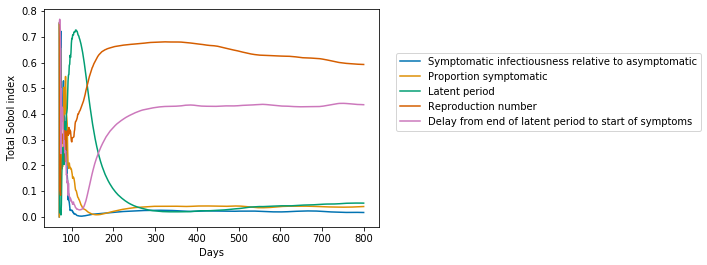

In [32]:
# plot total sobal index for each variable 
sns.set_palette("colorblind")
plt.figure()
x = range(801)
S_T = {i:np.zeros(801) for i in range(14)}

for key in S_u.keys():
    for index in key:
        S_T[index] += S_u[key]
        
for i,label in enumerate(sobols_first):
    y = S_T[i]
    if y[-1] > 0.01:
        sns.lineplot(x=x,y=y,label=params[i])
    
plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0.)
plt.xlabel('Days')
plt.ylabel('Total Sobol index')   

In [51]:
# this is useful to check if there are some significant high order interactions
for key in S_u.keys():
    if S_u[key][-1] > 0.005:
         print(key, S_u[key][-1])
            
print('\n key:')
for i,label in enumerate(sobols_first):
    print(i,label)

(0,) 0.005472780087740938
(1,) 0.027625736181479104
(2,) 0.04213500240837567
(4,) 0.46849349724467826
(8,) 0.31930523897078084
(0, 8) 0.007729019398348311
(1, 4) 0.010534636319573227
(2, 4) 0.006857900914839351
(4, 8) 0.10208714891128702

 key:
0 Symptomatic_infectiousness_relative_to_asymptomatic
1 Proportion_symptomatic
2 Latent_period
3 Mortality_factor
4 Reproduction_number
5 Infectious_period
6 Household_attack_rate
7 Household_transmission_denominator_power
8 Delay_from_end_of_latent_period_to_start_of_symptoms
9 Relative_transmission_rates_for_place_types0
10 Relative_transmission_rates_for_place_types1
11 Relative_transmission_rates_for_place_types2
12 Relative_transmission_rates_for_place_types3
13 Relative_spatial_contact_rates_by_age_power


# Cumulitive deaths 

I've modified wouters code from easyvvuq to generate 2 confidence intervals in one ensemble. 

In [15]:
def get_confidence_intervals(self, qoi, n_samples, conf1=0.36, conf2=0.9):
        """
        Compute the confidence intervals based upon samples of the SC surrogate.
        Uses a non-parametric approach based upon the empirical cumulative
        distribution function.

        Parameters:
        -----------
        qoi (str): name of the Quantity of Interest for which to compute the intervals
        n_samples (int): number of surrogate samples to be used in the computation
        conf (float in [0, 1]): the confidence interval magnitude

        Returns:
        --------
        lower, upper (array of floats): the upper and lower bound of the interval
        """

        #lower bound = alpha, upper bound = 1 - alpha 
        alpha1 = 0.5*(1.0 - conf1)
        alpha2 = 0.5*(1.0 - conf2)

        #draw n_samples draws from the input distributions
        xi_mc = np.zeros([n_samples, self.N])
        idx = 0
        for dist in self.sampler.vary.get_values():
            xi_mc[:, idx] = dist.sample(n_samples)
            idx += 1

        #sample the surrogate n_samples times
        surr_samples = np.zeros([n_samples, self.N_qoi])
        print('Sampling surrogate %d times' % (n_samples,))
        for i in range(n_samples):
            surr_samples[i, :] = self.surrogate(qoi, xi_mc[i])
            if np.mod(i, 100) == 0:
                print('%d of %d' % (i + 1, n_samples))
        print('done')

        #arrays for lower and upper bound of the interval
        lower = np.zeros(self.N_qoi)
        upper = np.zeros(self.N_qoi)

        #the probabilities of the ecdf
        prob = np.linspace(0, 1, n_samples)
        #the closest locations in prob that correspond to the interval bounds
        idx10 = np.where(prob <= alpha1)[0][-1]
        idx11 = np.where(prob <= 1.0 - alpha1)[0][-1]
        idx20 = np.where(prob <= alpha2)[0][-1]
        idx21 = np.where(prob <= 1.0 - alpha2)[0][-1]
        
        lower1 = np.zeros(self.N_qoi)
        lower2 = np.zeros(self.N_qoi)
        upper1 = np.zeros(self.N_qoi)
        upper2 = np.zeros(self.N_qoi)
        
        #for every location of qoi compute the ecdf-based confidence interval
        for i in range(self.N_qoi):
            #the sorted surrogate samples at the current location
            samples_sorted = np.sort(surr_samples[:, i])
            #the corresponding confidence interval
            lower1[i] = samples_sorted[idx10]
            upper1[i] = samples_sorted[idx11]
            lower2[i] = samples_sorted[idx20]
            upper2[i] = samples_sorted[idx21]
       
        total_deaths = surr_samples[:, -1]
        
        return lower1, upper1, lower2, upper2, total_deaths


In [16]:
lower1, upper1, lower2, upper2, total_deaths = get_confidence_intervals(analysis, 'cumDeath', 1000)

Sampling surrogate 1000 times
1 of 1000
101 of 1000
201 of 1000
301 of 1000
401 of 1000
501 of 1000
601 of 1000
701 of 1000
801 of 1000
901 of 1000
done


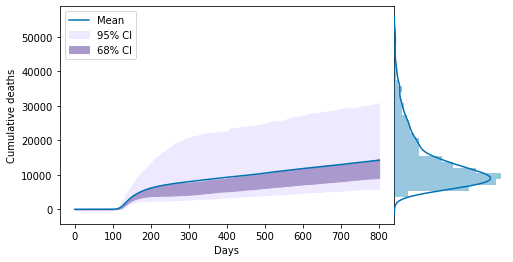

In [52]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

x = range(801)

fig = plt.figure(figsize=(8,4))
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[3, 1])

ax1 = fig.add_subplot(spec[0])
ax2 = fig.add_subplot(spec[1], sharey=ax1)
ax2.get_xaxis().set_ticks([])
fig.subplots_adjust(wspace=0)
plt.setp(ax2.get_yticklabels(), visible=False)

ax1.fill_between(x, lower2, upper2, color='#eee9ff', label='95% CI')
ax1.fill_between(x, lower1, upper1, color='#aa99cc', label='68% CI')
mean = results["statistical_moments"][output_columns[0]]["mean"]
ax1.plot(x,mean, label='Mean')
ax1.legend(loc="upper left")

ax1.set_xlabel('Days')
ax1.set_ylabel('Cumulative deaths')
ax2.set_xlabel('Frequency')
#ax2.set_title('Total deaths distribution')
ax2.axis('off')

ax2 = sns.distplot(total_deaths, vertical=True)

In [54]:
mean[-1], lower2[-1], upper2[-1]

(14229.345704732532, 5958.585119941656, 30870.2355802317)

In [18]:
total_deaths.mean()

13863.899968593922

In [19]:
total_deaths.std()

7997.4276908730235

In [20]:
from scipy.stats import skew, kurtosis
skew(total_deaths)

1.650387091047749

In [21]:
kurtosis(total_deaths)

2.8495997070073535

In [22]:
from scipy.stats import lognorm
stddev = total_deaths.std()
mean = total_deaths.mean()

dist=lognorm([stddev],loc=mean)

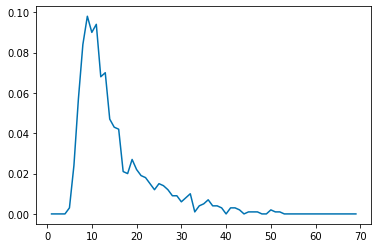

In [60]:
N=70
x = np.arange(1,N)

pdf = np.zeros(len(x))

for count in total_deaths:
    count = round(count/1000)
    pdf[int(count)] += 1

pdf = pdf / (sum(pdf))

sns.lineplot(x=x,y=pdf)

In [27]:
def lognormal(x,sig,mu):
    factor = 1/(x*sig*np.sqrt(2*np.pi))
    top = (np.log(x) - mu)**2
    bot = 2 * sig * sig
    return factor * np.exp(-top/bot)

In [61]:
from scipy.optimize import curve_fit

coeff,cov = curve_fit(lognormal,x,pdf, p0=[1,2])

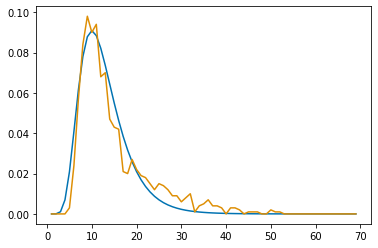

In [65]:
sns.lineplot(x=x, y=lognormal(x,*coeff))
sns.lineplot(x=x,y=pdf)

In [66]:
def mean(sig, mu):
    return np.exp(mu + sig*sig/2)
mean(*coeff)

12.784951175866329

In [67]:
skew(lognormal(x,*coeff)),kurtosis(lognormal(x,*coeff))

(1.825589496831762, 1.9503542951291548)

### Blowup factor

In [33]:
blowup = analysis.get_uncertainty_blowup(output_columns[0])

Computing moments...
done
-----------------
Mean CV input = 0.2032 %
Mean CV output = 0.7872 %
Uncertainty blowup factor = 0.7872/0.2032 = 3.8745 %
-----------------


/Users/robertsinclair/anaconda3/envs/easyvvuq/lib/python3.6/site-packages/easyvvuq-0.5.3+25.g08262e4-py3.6.egg/easyvvuq/analysis/sc_analysis.py:1446: RuntimeWarning: invalid value encountered in true_divide


In [58]:
import chaospy as cp
mean_f, var_f = analysis.get_moments('cumDeath')
std_f = np.sqrt(var_f)

mean_xi = []; std_xi = []; CV_xi = []
for param in analysis.sampler.params_distribution:
            E = cp.E(param); Std = cp.Std(param)
            mean_xi.append(E)
            std_xi.append(Std)
            CV_xi.append(Std/E)

CV_in = np.mean(CV_xi)
CV_out = std_f/mean_f
idx = np.where(np.isnan(CV_out) == False)[0]
CV_out = np.mean(CV_out[idx])
blowup = CV_out / CV_in

print('-----------------')
print('Mean CV input = %.4f %%' % (CV_in, ))
print('Mean CV output = %.4f %%' % (CV_out, ))
print('Uncertainty blowup factor = %.4f/%.4f = %.4f %%' % (CV_out, CV_in, blowup))
print('-----------------')

Computing moments...
done
-----------------
Mean CV input = 0.2032 %
Mean CV output = 0.7872 %
Uncertainty blowup factor = 0.7872/0.2032 = 3.8745 %
-----------------


/Users/robertsinclair/anaconda3/envs/easyvvuq/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
